In [31]:
from astropy.table import Table
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit
from astropy.io import ascii
import matplotlib.pyplot as plt
from multiprocessing import Pool
# from scipy.integrate import quad

# Time range around the horizon crossing
startTime = 390+1.92224*10**8
stopTime = 500+1.92224*10**8

# indices for the event file
startTimeIndex = 311883
stopTimeIndex = 352360

index10 = 311890
index15 = 311908
index20 = 312145
index25 = 312979
index30 = 314519
index35 = 316544
index40 = 318813
index45 = 321290
index50 = 324011
index_unattenuated_start = 329746
index75 = 338442
index80 = 341422
index85 = 344342

# read in the data files
tab_ni = Table.read('ni2200300102.mkf', hdu=1)
timeArray = np.array(tab_ni['TIME'])
elevArray = np.array(tab_ni['ELV'])

tab_evt = Table.read('cleanfilt.evt', hdu=1)
eventTime = np.array(tab_evt['TIME'])
enArray = np.array(tab_evt['PI'])
azArray = np.array(tab_ni['RAM_ANGLE'])


# interpolate the times.evt to go over the range of elevations.mkf
f = interpolate.interp1d(timeArray, elevArray, kind='linear')
elev_evt = f(eventTime)

g = interpolate.interp1d(timeArray, azArray, kind='linear')
az_evt = g(eventTime)

# calculate altitude based on elevation angle
R = 6378
H = 410
theta = np.arcsin(R/(R+H))
altArray = []
for indx, val in enumerate(elev_evt):
    h = ((R+H)*np.sin(theta+val*(np.pi/180)))-R
    altArray.append(np.float(h))
altArray = np.array(altArray)


# read in MSIS model data
data = ascii.read("msis_model.txt")

height = np.array(data['km'])
density = np.array(data['g/cm^3'])
temp = np.array(data['K'])


        

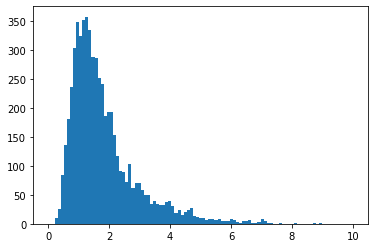

In [32]:
array_unattenuated = plt.hist(enArray[index75:index85]/100, bins = np.linspace(0,10,100))

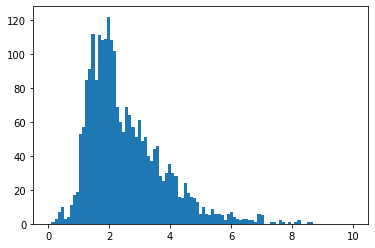

In [33]:
array20_30 = plt.hist(enArray[index20:index30]/100, bins = np.linspace(0,10,100))

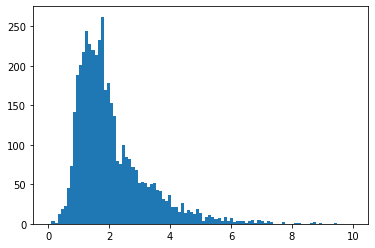

In [34]:
array30_40 = plt.hist(enArray[index30:index40]/100, bins = np.linspace(0,10,100))

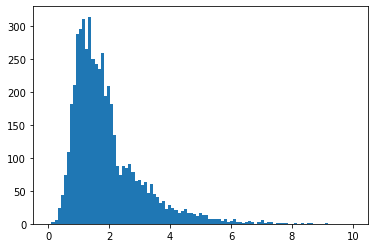

In [35]:
array40_50 = plt.hist(enArray[index40:index50]/100, bins = np.linspace(0,10,100))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avo

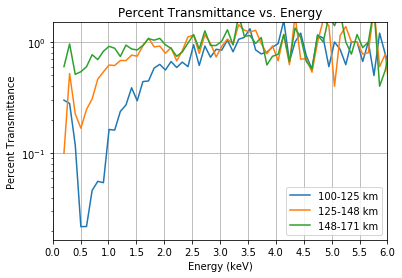

In [45]:
plt.plot(array_unattenuated[1][:99],array20_30[0]/array_unattenuated[0], label = f'{int(altArray[index20])}-{int(altArray[index30])} km')
plt.plot(array_unattenuated[1][:99],array30_40[0]/array_unattenuated[0], label = f'{int(altArray[index30])}-{int(altArray[index40])} km')
plt.plot(array_unattenuated[1][:99],array40_50[0]/array_unattenuated[0], label = f'{int(altArray[index40])}-{int(altArray[index50])} km')

plt.yscale('log')

plt.ylim(0,1.5)
plt.xlim(0,6)

plt.xticks(np.arange(0,6.5,.5))
plt.grid()

plt.title('Percent Transmittance vs. Energy')
plt.ylabel('Percent Transmittance')
plt.xlabel('Energy (keV)')
plt.legend()